Aluno: Vinicius Santana da Silva Brandão

Disciplina: Introdução a Ciência de Dados

Primeira avaliação Análise de Dados.

Dataset available extracted from: https://coinmarketcap.com/currencies/bitcoin/historical-data/ (feb 17, 2024)<br/>
Execute as células em ordem para que funcionem corretamente.

This dataset contains the Bitcoin historical data, wich will be studied throught this notebook and presented for a data science introduction class evaluation.

For the comparison, the models will be only broadly evaluated, wich means that only the accuracy and/or squared errors will be itinally evaluated, and for the best performing model, a more thorough evaluation will be done.

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from prettytable import PrettyTable


In the first cell, a class will be defined to read and split the data in a controllable fashion 

In [52]:
# Essa classe de importação e separação dos dados foi retirada de projeto feito por mim em outra disciplina.

class import_datasets:
    def __init__(self):
        self.train = 0
        self.test = 0
        self.validate = 0
    
    def load_train_data(self):
        dataset = pd.read_csv('train.csv')
        self.train_data = dataset
        return dataset

    def load_test_data(self):
        dataset = pd.read_csv('test.csv')
        # self.load_test_data = dataset
        return dataset

    def custom_train_val_test_split(self, X, y, test1_size, test_size, random_state):
        np.random.seed(random_state)
        shuffled_indices = np.random.permutation(len(X))
        
        val_set_size = int(len(X) * test1_size)
        test_set_size = int(len(X) * test_size)
        
        val_indices = shuffled_indices[:val_set_size]
        test_indices = shuffled_indices[val_set_size : val_set_size + test_set_size]
        train_indices = shuffled_indices[val_set_size + test_set_size:]
        
        X_train, X_val, X_test = X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices]
        y_train, y_val, y_test = y.iloc[train_indices], y.iloc[val_indices], y.iloc[test_indices]

        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        
        X_train = pd.DataFrame(X_train)
        
        return  X_train.values.tolist(), X_val.values.tolist(), X_test.values.tolist(),\
                y_train.values.tolist(), y_val.values.tolist(), y_test.values.tolist()


Aqui será feita a separação entre o valor de abertura do bitcoin no dia, que queremos avaliar, dos outros dados, e a remoção de dados sobre datas e horários que serão desconsiderados de acordo com a orientação para o projeto.

In the second cell, the separation between the X and y will take place, y is the predicted value and X the data used to predict y. Here time and date related data will also be removed, acording to the demands given for this project.

In [54]:
test1_size = 0.1
test_size = 0.1
random_state = 133

p = import_datasets()
train_data = p.load_train_data()


X = train_data.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'timestamp', 'name'], axis=1)
y = train_data['open']

print(X.columns.tolist())  # Print remaining labels in X
print(X.head(1))  # Print only the first line of X

X_train, X_val, X_test, y_train, y_val, y_test = p.custom_train_val_test_split(X, y, test1_size, test_size, random_state)


['high', 'low', 'close', 'volume', 'marketCap']
           high           low         close        volume     marketCap
0  52537.970228  51641.367219  52160.202829  2.818057e+10  1.023894e+12


/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

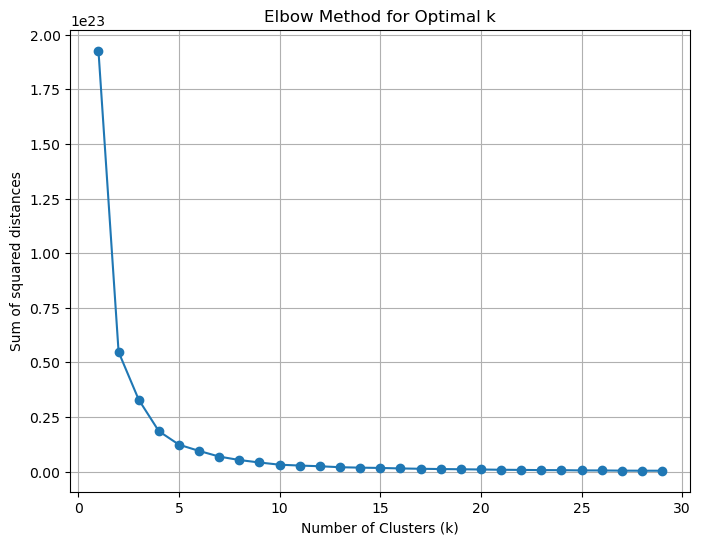

+------------------------+--------------------------+
| Number of Clusters (k) | Sum of Squared Distances |
+------------------------+--------------------------+
|           1            |       1.92700e+23        |
|           2            |       5.47527e+22        |
|           3            |       3.29069e+22        |
|           4            |       1.84788e+22        |
|           5            |       1.23066e+22        |
|           6            |       9.44455e+21        |
|           7            |       6.85305e+21        |
|           8            |       5.27788e+21        |
|           9            |       4.14430e+21        |
|           10           |       3.13653e+21        |
|           11           |       2.74659e+21        |
|           12           |       2.42380e+21        |
|           13           |       1.98963e+21        |
|           14           |       1.78504e+21        |
|           15           |       1.64994e+21        |
|           16           |  

In [55]:
clusters_range = range(1, 50)

inertia_values = []
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)  
    inertia_values.append(kmeans.inertia_) #the inertia is the sum of squared distances

plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


table = PrettyTable()
table.field_names = ['Number of Clusters (k)', 'Sum of Squared Distances']

# Populate the table with data
for n_clusters, inertia in zip(clusters_range, inertia_values):
    table.add_row([n_clusters, '{:.5e}'.format(inertia)]) 

# Print the table
print(table)


Since after k = 5, the decrease slows down considerably, the chosen k will be 7, considering the elbow method.

In [50]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=7) 

# Train the classifier
knn.fit(X,y)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# RMS (Root Mean Squared)
rms = np.sqrt(np.mean((y_test - y_pred)**2))


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"RMS: {rms}")




    name          high           low         close        volume     marketCap
23  2781  40483.783878  39508.798464  40077.073270  2.235953e+10  7.858099e+11
11  2781  43494.248632  42264.817297  42658.666048  1.871549e+10  8.369361e+11
0   2781  52537.970228  51641.367219  52160.202829  2.818057e+10  1.023894e+12
5   2781  48535.935910  47617.405365  48293.916751  1.931587e+10  9.477742e+11
10  2781  43344.148218  42529.021423  43084.671864  1.679848e+10  8.453385e+11
30  2781  43189.890511  42189.310528  42742.652837  2.085123e+10  8.378049e+11
8   2781  45575.841721  44332.125602  45301.566629  2.615452e+10  8.889215e+11
12  2781  43097.644016  42374.833902  42583.582920  1.480223e+10  8.354218e+11
44  2781  45503.241795  40813.534868  42848.175641  4.634232e+10  8.393459e+11
57  2781  44240.669128  43330.052646  43869.150857  2.245277e+10  8.588198e+11
52  2781  43603.175442  41676.489968  42520.401511  3.002685e+10  8.326201e+11
21  2781  42209.385175  39825.692231  41816.872844  

ValueError: Unknown label type: 'continuous'

Now applying the svm

In [49]:
# Initialize SVM classificator with linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)  

# Treinar o classificador SVM
svm_classifier.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_svm = svm_classifier.predict(X_test)

# Avaliar o desempenho
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
svm_rms = np.sqrt(np.mean((y_test - y_pred_svm)**2))


print(f"Accuracy (SVM): {accuracy_svm}")
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print(f"SVM RMS: {svm_rms}")

ValueError: Unknown label type: 'continuous'

Results:<br/>
    
    knn:
    Accuracy: 0.9325
    Confusion Matrix:
     85  2   0   0
     5   94  1   0
     0   6   103 7
     0   0   6   91
    RMS: 0.2598076211353316

    svm: 
    Accuracy (SVM): 0.95
    Confusion Matrix (SVM):
       82   5   0    0
       1    96  3    0
       0    2   108  6
       0    0   3    94
    SVM RMS: 0.22360679774997896

The chosen metrics for results were accuracy, confusion matrix and RMS error.<br/>
The three of them point to the svm being potentially better at solving this particular problem, but for this sample size (2000 samples) and  400 being analyzed, the difference is smaller than 2%, so this can be considered negligible and is subject to change in a case by case fluctuation, depending on the dataset split. Both got a rms error between 0.2 and 0.3, wich is high considering the magnitude of the data being classified (Close to the same order of magnitude). <br/>  Both methods were suficient to understand and predict with satisfactory accuracy and resulting in a useful and representative decision boundrie to the proposed problem.